# Aisha M Nawaz 

## Project : Web Scraping for Real Estate Listings


### Description: A real estate agency, wants to improve their property search platform by enriching it with data from other online real estate platforms. Goal is to build a web scraper that can collect property listings from a popular real estate website.

### Dataset: Real Estate Listings (Scrape Dataset zameen.com etc). For this project, you will build a web scraper using Python libraries like Beautiful Soup and Requests to extract property details such as location, price, number of bedrooms, and amenities from an online real estate platform.

## Steps:

In [95]:
# 1) Data Collection: Create a web scraper to extract property listings and details from the target real estate website.

import pandas as pd
import requests
from bs4 import BeautifulSoup
import openpyxl

url='https://www.zameen.com/Homes/'

responseMAINPAGE = requests.get(url)
soupMAINPAGE = BeautifulSoup(responseMAINPAGE.content, 'html.parser')
subURLS=[anchor.get('href', '') for anchor in soupA.find_all('a')] #Getting urls of all the subpages (Like all the cities)

def scrapeZameen(url,name):
    try:
        response = requests.get(url)
        if response.status_code == 200: #If successful
            # Parsing html
            soup = BeautifulSoup(response.content, 'html.parser')
            
            results=[]
            #Getting all the main infos
            titles = [title.text.strip() for title in soup.select('h2.c0df3811')]
            prices = [price.text.strip() for price in soup.select('span[aria-label="Price"]')]
            locations = [location.text.strip() for location in soup.select('div._162e6469')]
            details = [detail.text.strip() for detail in soup.select('span.b779b320')]
            
            smallest=min([len(titles),len(locations),len(prices),len(details)]) #To avoid errors finding smallest length
            
            for i in range (smallest):
                results.append([titles[i],locations[i],prices[i],details[i],name]) #Saving all the relevant information in result list
            
            if(results): #Means some info scrapped
                print('SCRAPPING SUCESSFULL!')
            else:
                print('SCRAPPING UNSUCESSFULL :( TRY AGAIN LATER.')

            return results
        else:
            print(f"Error: Failed to fetch the webpage. Status code: {response.status_code}")
            return None

    except requests.exceptions.RequestException as e:
        print(f"Error: {e}")
        return None
    
mainResults=[['Title','Location','Price','Details','city']]

for city in cities:
    name=city.split("-")
    print("SCRAPPING FROM",city)
    resultIntermediate=scrapeZameen(url+city,name[0]) #Going to the suburl & scrapping data from it
    mainResults=mainResults+resultIntermediate #Combining results
    

#Saving all results extracted in xlsx file
if(len(mainResults)>1):    #if any results found worth saving  
    DATAFRAME = pd.DataFrame(mainResults[1:], columns=mainResults[0]) #Converting result list to dataframe
    # Saving the DataFrame to an Excel file
    fileNAME = 'ZAMEEN.xlsx'
    DATAFRAME.to_excel(file_path, index=False)
    print("RESULTS SAVED TO : ",fileNAME) 

SCRAPPING FROM Lahore-1-1.html
SCRAPPING SUCESSFULL!
SCRAPPING FROM Islamabad-3-1.html
SCRAPPING SUCESSFULL!
SCRAPPING FROM Karachi-2-1.html
SCRAPPING SUCESSFULL!
SCRAPPING FROM Rawalpindi-41-1.html
SCRAPPING SUCESSFULL!
SCRAPPING FROM Abbottabad-385-1.html
SCRAPPING SUCESSFULL!
SCRAPPING FROM Abdul_Hakim-10594-1.html
SCRAPPING SUCESSFULL!
SCRAPPING FROM Ahmedpur_East-12360-1.htmlAlipur-10242-1.html
SCRAPPING SUCESSFULL!
RESULTS SAVED TO :  ZAMEEN.xlsx


In [96]:
# Reading saved data
data=pd.read_excel('ZAMEEN.xlsx')
data.head()

,Title,Location,Price,Details,city
0,5 Marla Brand New Modern Designer Bungalow For...,"DHA 9 Town, DHA Defence",1.79 Crore,NEW HIRA ESTATE OFFER\n5 MARLA BRAND,Lahore
1,1KANAL EYE CATCHING MOST AWAITED VICTORIAN BUN...,"DHA Phase 5, DHA Defence",7.86 Crore,LEADS ESTATES beautiful Elegant Mod,Lahore
2,3 Years Installment Plus Cash Based 3 Marla Sp...,"Thokar Niaz Baig, Lahore",79.5 Lakh,Jazac City Lahore is ideally locate,Lahore
3,5 Years Installment Base 3 Marla Beautiful Hou...,"Ferozepur Road, Lahore",90 Lakh,Rehan garden phase 2 Lahore is idea,Lahore
4,05 MARLA BRAND NEW SUPER LUXURY HOUSE FOR SALE...,"DHA 9 Town - Block A, DHA 9 Town",90 Lakh,05 MARLA BRAND NEW SUPER LUXURY HOU,Lahore


In [83]:
# 2) Data Cleaning: Clean and preprocess the scraped data, handle missing values, and ensure data consistency.
data.isnull().sum()
data.dropna(inplace=True) #Dropping null values

In [99]:
# Removing inconsistencies
data['Price'] = data['Price'].str.replace(r'\bCrore\b', '0000000', regex=True)
data['Price'] = data['Price'].str.replace(r'\bLakh\b', '00000', regex=True)
data['Price'] = data['Price'].str.replace(r'\b.\b', '', regex=True)

In [101]:
data.describe()

,Title,Location,Price,Details,city
count,172,172,172,172,172
unique,163,98,60,152,7
top,Beautifull Designed Brand New House Availabled...,"Abdul Hakim, Punjab",0000000,This is area unit,Lahore
freq,5,22,80,11,25


In [102]:
data['city'].value_counts()

Lahore           25
Islamabad        25
Karachi          25
Rawalpindi       25
Abbottabad       25
Ahmedpur_East    25
Abdul_Hakim      22
Name: city, dtype: int64

In [104]:
data['Price']=data['Price'].astype(float) #Making the coloumn numerical

In [106]:
# Applying one-hot encoding to categorical coloumns
encodedData=pd.get_dummies(data,columns=["city"])
encodedData.head()

,Title,Location,Price,Details,city_Abbottabad,city_Abdul_Hakim,city_Ahmedpur_East,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi
0,5 Marla Brand New Modern Designer Bungalow For...,"DHA 9 Town, DHA Defence",790000000.0,NEW HIRA ESTATE OFFER\n5 MARLA BRAND,0,0,0,0,0,1,0
1,1KANAL EYE CATCHING MOST AWAITED VICTORIAN BUN...,"DHA Phase 5, DHA Defence",860000000.0,LEADS ESTATES beautiful Elegant Mod,0,0,0,0,0,1,0
2,3 Years Installment Plus Cash Based 3 Marla Sp...,"Thokar Niaz Baig, Lahore",7900000.0,Jazac City Lahore is ideally locate,0,0,0,0,0,1,0
3,5 Years Installment Base 3 Marla Beautiful Hou...,"Ferozepur Road, Lahore",9000000.0,Rehan garden phase 2 Lahore is idea,0,0,0,0,0,1,0
4,05 MARLA BRAND NEW SUPER LUXURY HOUSE FOR SALE...,"DHA 9 Town - Block A, DHA 9 Town",9000000.0,05 MARLA BRAND NEW SUPER LUXURY HOU,0,0,0,0,0,1,0


In [112]:
# Applying Min-Max scaler to numerical column,price
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
encodedData['Price']=scaler.fit_transform(encodedData[["Price"]])
encodedData.head()

,Title,Location,Price,Details,city_Abbottabad,city_Abdul_Hakim,city_Ahmedpur_East,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi
0,5 Marla Brand New Modern Designer Bungalow For...,"DHA 9 Town, DHA Defence",0.065182,NEW HIRA ESTATE OFFER\n5 MARLA BRAND,0,0,0,0,0,1,0
1,1KANAL EYE CATCHING MOST AWAITED VICTORIAN BUN...,"DHA Phase 5, DHA Defence",0.070957,LEADS ESTATES beautiful Elegant Mod,0,0,0,0,0,1,0
2,3 Years Installment Plus Cash Based 3 Marla Sp...,"Thokar Niaz Baig, Lahore",0.000652,Jazac City Lahore is ideally locate,0,0,0,0,0,1,0
3,5 Years Installment Base 3 Marla Beautiful Hou...,"Ferozepur Road, Lahore",0.000743,Rehan garden phase 2 Lahore is idea,0,0,0,0,0,1,0
4,05 MARLA BRAND NEW SUPER LUXURY HOUSE FOR SALE...,"DHA 9 Town - Block A, DHA 9 Town",0.000743,05 MARLA BRAND NEW SUPER LUXURY HOU,0,0,0,0,0,1,0


In [113]:
# 3)  Data Storage: Save the cleaned data in a structured format, such as a CSV or a database.
data.to_csv("ZAMEEN_CLEAN.csv")
encodedData.to_csv("ZAMEEN_ENCODED.csv")

In [160]:
# 4) Data Analysis: Perform basic exploratory data analysis to gain insights into the collected property data.
encodedData.describe()

,Price,city_Abbottabad,city_Abdul_Hakim,city_Ahmedpur_East,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,0.018597,0.145349,0.127907,0.145349,0.145349,0.145349,0.145349,0.145349
std,0.100216,0.353481,0.334961,0.353481,0.353481,0.353481,0.353481,0.353481
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000285,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.004538,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


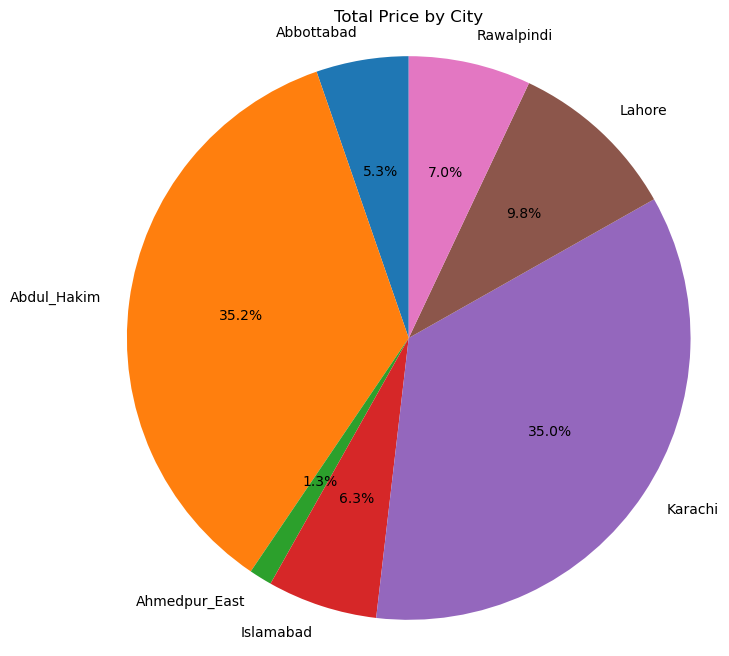

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a pie chart for Total Price by city
plt.figure(figsize=(8, 8))
plt.pie(data.groupby('city')['Price'].sum(), labels=data.groupby('city')['Price'].sum().index, autopct='%1.1f%%', startangle=90)
plt.title('Total Price by City')
plt.axis('equal')  
plt.show()

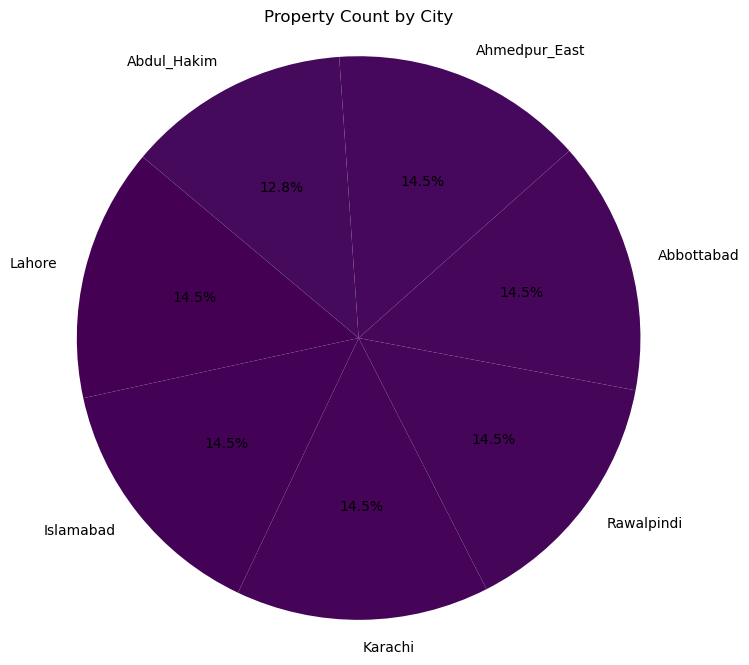

In [138]:
# Property count by city
cities=data['city'].value_counts().values
# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(cities, labels=data['city'].value_counts().index, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis.colors)
plt.axis('equal')  
plt.title('Property Count by City')
plt.show()

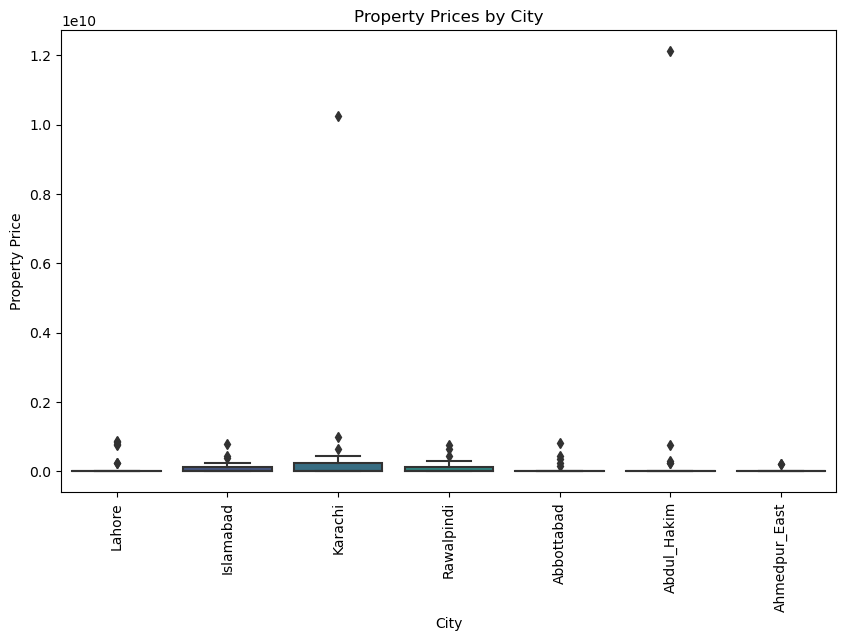

In [139]:
# Box Plot of Property Prices by City
plt.figure(figsize=(10, 6))
sns.boxplot(x='city', y='Price', data=data, palette='viridis')
plt.xlabel('City')
plt.ylabel('Property Price')
plt.title('Property Prices by City')
plt.xticks(rotation=90)
plt.show()

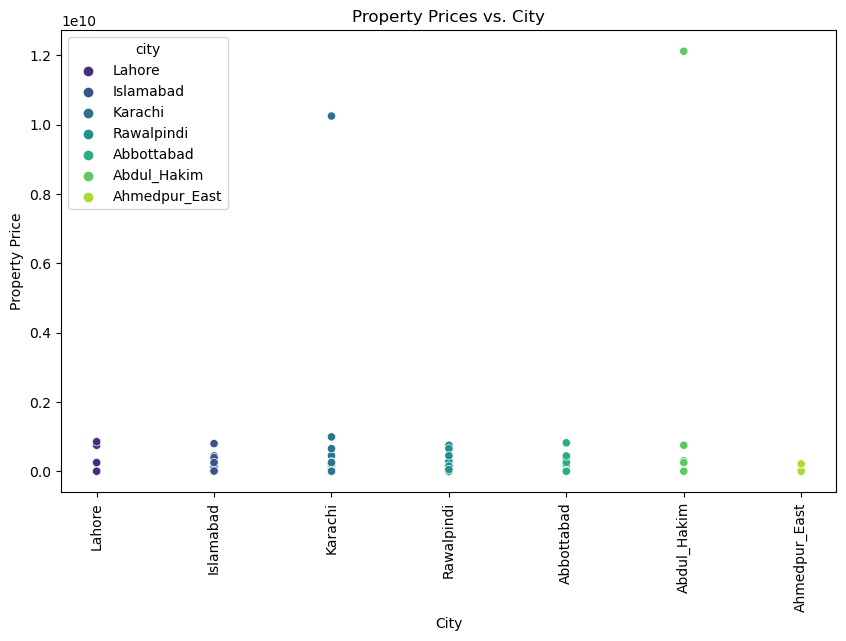

In [145]:
# Property Prices vs. City with scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='city', y='Price', data=data,hue='city', palette='viridis')
plt.xlabel('City')
plt.ylabel('Property Price')
plt.title('Property Prices vs. City')
plt.xticks(rotation=90)
plt.show()

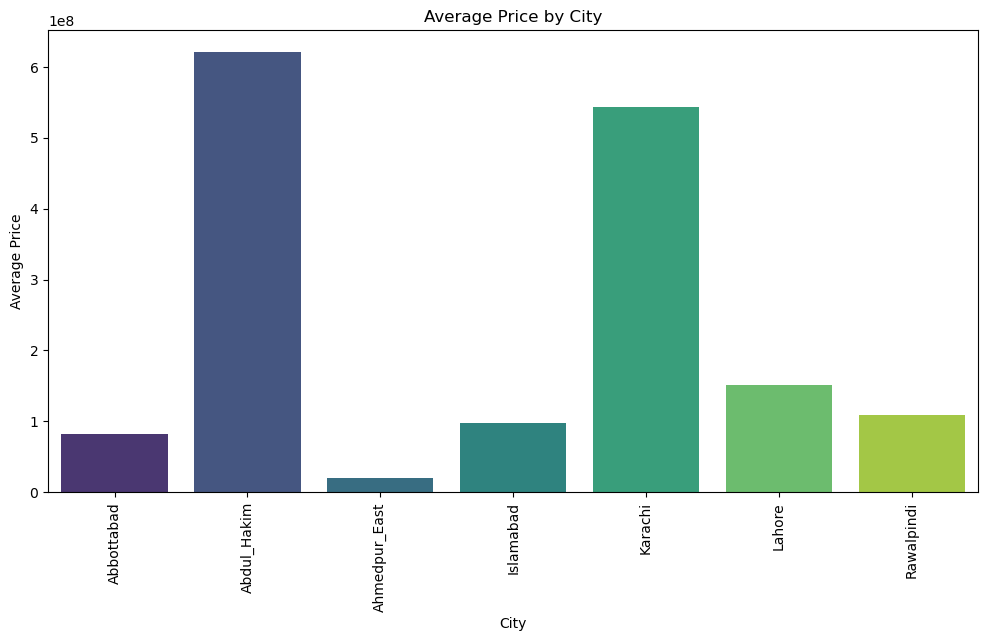

In [147]:
# Average Price by City
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='Price', data=data.groupby('city')['Price'].mean().reset_index(), palette='viridis')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.title('Average Price by City')
plt.xticks(rotation=90)
plt.show()

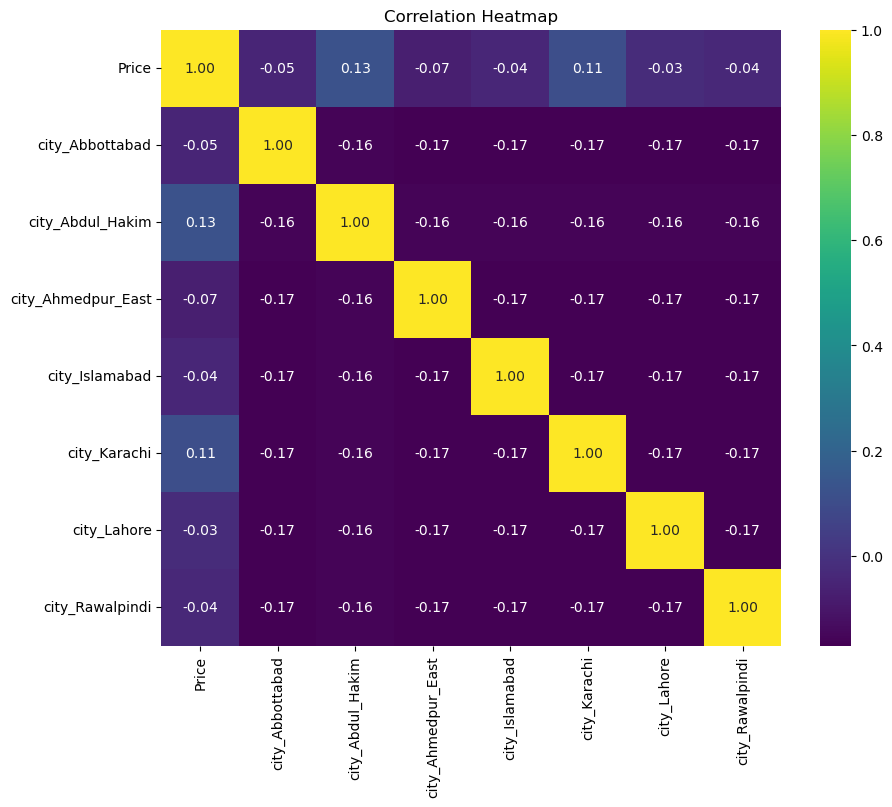

In [153]:
# Heatmap of property Prices
correlationMatrix = encodedData.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlationMatrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()